In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import skewnorm
from ll_xy import lonlat_to_xy
from scipy.stats import linregress
import datetime
import string
import cartopy
import tools
import cartopy.crs as ccrs
import pandas as pd
from dateutil.relativedelta import relativedelta
pd.set_option("mode.chained_assignment", None)

dep_l = pickle.load(open('../pickles/line_depths_dict.p','rb'))
statistics = pickle.load(open('../pickles/statistics.p','rb'))

In [2]:
df = pd.read_excel('../SHEBA_transects/SHEBAsnowNCAR.xls',sheet_name='Atlanta',skiprows=6)

dates = [d for d in df.columns if type(d) == datetime.datetime]

len(dates)

47

In [3]:
df = pd.read_excel('../SHEBA_transects/SHEBAsnowNCAR.xls',sheet_name='Atlanta',skiprows=12)

df

,distance,Depth (cm),Unnamed: 2,distance.1,Depth (cm).1,Unnamed: 5,distance.2,Depth (cm).2,Unnamed: 8,distance.3,...,Unnamed: 131,Unnamed: 132,depth(cm).12,Unnamed: 134,depth(cm).13,distance.17,depth(cm).14,Unnamed: 138,distance.18,depth(cm).15
0,0.0,14.0,NaN,0.000,21.0,NaN,0.000,20.0,NaN,0.000,...,NaN,0.000000,9.0,0.000000,9.0,0.000000,11.0,NaN,0.000000,11.0
1,5.0,10.0,NaN,2.222,8.0,NaN,2.273,19.0,NaN,2.273,...,NaN,1.098901,8.0,0.952381,8.0,0.796813,14.0,NaN,0.833333,15.0
2,10.0,17.0,NaN,4.444,16.0,NaN,4.546,12.0,NaN,4.546,...,NaN,2.197802,8.0,1.904762,9.0,1.593625,15.0,NaN,1.666667,16.0
3,15.0,22.0,NaN,6.666,11.0,NaN,6.819,17.0,NaN,6.819,...,NaN,3.296703,12.0,2.857143,9.0,2.390438,12.0,NaN,2.500000,18.0
4,20.0,9.0,NaN,8.888,23.0,NaN,9.092,20.0,NaN,9.092,...,NaN,4.395604,7.0,3.809524,7.0,3.187251,11.0,NaN,3.333333,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nas = {}

real_cols = [col for col in df if 'cm' in col]

for column, date in zip(real_cols, dates):
    

    depths = df[column]

    clean_depths = np.array([abs(d) for d in depths if (str(d) != 'nan') & (str(d) != ' ')])[::1].astype(float)


    mean_depth = np.mean(clean_depths)
    std_depth = np.std(clean_depths)

    anoms = clean_depths - mean_depth

    normed_anoms = anoms/std_depth

    d = {}
    for skip in [1,2,5,10]:
        d[skip] = list(normed_anoms)[::skip]
    
    nas[date] = d

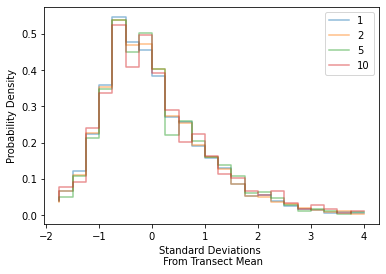

In [15]:
bin_edges = np.arange(-2,4.01,0.25)

for skip in [1,2,5,10]:
    
    big_list = []
    
    for key in nas:
        
        big_list += list(nas[key][skip])
        
    vals, bcs = np.histogram(big_list,density=True,bins=bin_edges)
    
    plt.step(bcs[1:],vals, label=skip, alpha=0.5)
    
plt.legend()

plt.xlabel('Standard Deviations \n From Transect Mean')
plt.ylabel('Probability Density')

plt.show()